<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/Multiplos%20perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1: Loss = 1.0026, Accuracy = 0.6233
Epoch 2: Loss = 0.9776, Accuracy = 0.6267
Epoch 3: Loss = 0.9526, Accuracy = 0.6300
Epoch 4: Loss = 0.9289, Accuracy = 0.6367
Epoch 5: Loss = 0.9049, Accuracy = 0.6367
Epoch 6: Loss = 0.8825, Accuracy = 0.6367
Epoch 7: Loss = 0.8607, Accuracy = 0.6400
Epoch 8: Loss = 0.8389, Accuracy = 0.6500
Epoch 9: Loss = 0.8184, Accuracy = 0.6533
Epoch 10: Loss = 0.7986, Accuracy = 0.6567
Epoch 11: Loss = 0.7800, Accuracy = 0.6600
Epoch 12: Loss = 0.7611, Accuracy = 0.6633
Epoch 13: Loss = 0.7431, Accuracy = 0.6633
Epoch 14: Loss = 0.7263, Accuracy = 0.6667
Epoch 15: Loss = 0.7091, Accuracy = 0.6733
Epoch 16: Loss = 0.6928, Accuracy = 0.6800
Epoch 17: Loss = 0.6775, Accuracy = 0.6867
Epoch 18: Loss = 0.6624, Accuracy = 0.7067
Epoch 19: Loss = 0.6478, Accuracy = 0.7200
Epoch 20: Loss = 0.6339, Accuracy = 0.7467
Epoch 21: Loss = 0.6208, Accuracy = 0.7800
Epoch 22: Loss = 0.6076, Accuracy = 0.8067
Epoch 23: Loss = 0.5951, Accuracy = 0.8333
Epoch 24: Loss = 0.5

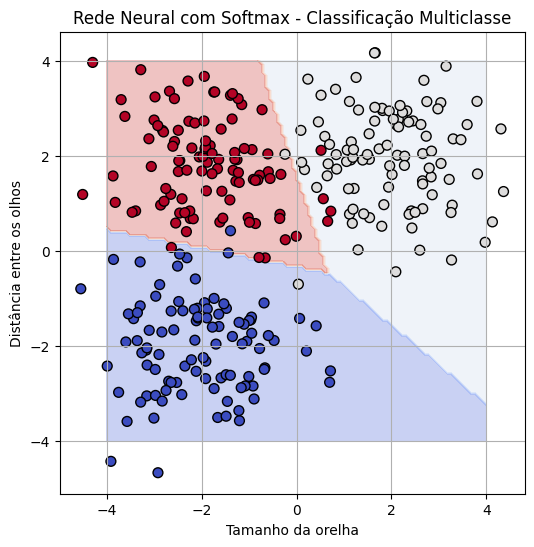

In [1]:
# Importa bibliotecas essenciais
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelBinarizer

# Gera um conjunto de dados sintéticos com 3 agrupamentos (classes)
# Cada ponto tem 2 atributos (x1, x2) e pertence a uma das classes: 0 (gato), 1 (cachorro), 2 (coelho)
X, y = make_blobs(n_samples=300,
                  centers=[[-2, -2], [2, 2], [-2, 2]],
                  cluster_std=1.0,
                  random_state=39)

# Codifica os rótulos (0, 1, 2) no formato one-hot
# Exemplo: 0 → [1, 0, 0], 1 → [0, 1, 0], 2 → [0, 0, 1]
encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(y)

# Cria uma rede neural com 1 camada densa (sem camadas ocultas)
# A camada tem 3 neurônios (um para cada classe), com ativação softmax para gerar uma distribuição de probabilidade
model = keras.Sequential([
    keras.layers.Dense(3, input_shape=(2,), activation="softmax")  # saída exclusiva
])

# Compila o modelo:
# - Otimizador: Adam
# - Função de perda: categorical_crossentropy (adequada para classificação multiclasse com softmax)
# - Métrica: acurácia
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Callback para exibir o progresso do treinamento por época
class PrintEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")

# Treina o modelo com os dados gerados, por 50 épocas
model.fit(X, y_onehot, epochs=50, verbose=0, callbacks=[PrintEpoch()])

# Cria uma grade de pontos no plano para visualizar a saída do modelo
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Previsão para cada ponto da grade → classe com maior probabilidade
Z = np.argmax(model.predict(grid_points), axis=1).reshape(xx.shape)

# Gráfico 2D com:
# - Regiões coloridas indicando as áreas de decisão
# - Pontos reais coloridos conforme suas classes verdadeiras
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=50)
plt.title("Rede Neural com Softmax - Classificação Multiclasse")
plt.xlabel("Tamanho da orelha")
plt.ylabel("Distância entre os olhos")
plt.grid()
plt.show()
